Embeddings
===
MAIC - Spring, Week 4<br>
```
  _____________
 /0   /     \  \
/  \ M A I C/  /\
\ / *      /  / /
 \___\____/  @ /
          \_/_/
```
(Rosie is not needed!)

Prereqs:
- Install [VSCode](https://code.visualstudio.com/)
- Install [Python](https://www.python.org/downloads/)
- Ensure you can run notebooks in VSCode.

Job listing dataset credit: https://www.kaggle.com/datasets/kshitizregmi/jobs-and-job-description (You don't need to download this yourself)

Run the below pip installs now so we don't have to wait for them later: 

In [ ]:
# Shouldn't take longer than ~5 mins
%pip install sentence-transformers
%pip install tf-keras
%pip instal numpy
%pip install matplotlib


<span style="color:#ff5555;font-weight:bold;font-size:1.5rem;">
    STOP
</span>

... or keep going if you want to work ahead.

---

Embeddings are an extremely useful tool in modern machine learning, allowing raw text to be transformed into numerical representations that models can understand.
They are also a popular interview question to test a candidate’s understanding of vector spaces, similarity metrics, and real-world applications.
Beyond that, embeddings are incredibly common in ML, powering everything from search engines and recommendation systems to chatbots and fraud detection.
You'll see embeddings being used everywhere if you look! Here are just some models, projects, and papers that make use of embeddings:
- [The original transformer paper - the basis of modern LLMs](https://arxiv.org/pdf/1706.03762)
- [RAG systems - often used to give LLMs comprehensive access to much more information than they could normally use at once](https://en.wikipedia.org/wiki/Retrieval-augmented_generation)
- [Image generations models such as Stable Diffusion](https://en.wikipedia.org/wiki/Stable_Diffusion)
  - Note: images are generated *in embedding space*!
- [Audio-continuation models such as RAVE](https://github.com/acids-ircam/RAVE)
- Modern image search makes extensive use of embeddings
- Modern recommendation algorithms also use embeddings
- Even some papers published by MSOE students involve the use of embeddings! Here are a few:
  - [Agent simulation with LLMs](https://arxiv.org/pdf/2409.13753)
  - [Strategy masking - a technique to control model behavior](https://arxiv.org/pdf/2501.05501)

**What *are* Embeddings?**

At the lowest level, an embedding is just stored as a list of numbers. This could be an embedding: `[0.1, 0.2, -0.3]`.

This list of numbers is best interpreted as a point or direction in some very high-dimensional space that represents something. In the case of text-based models, embeddings are used to represent words and sentences.

In practice, embeddings range from tens of dimensions to over 1000. For simplicity, let's only conceptualize things in two or three dimensions for now - that way we can actually visualize what's going on.

The image below shows how embedded words of the phrase `some embedded text` can be thought of as directions in space - the embedding point describes direction relative to the point (0,0).

<img src="https://raw.githubusercontent.com/MSOE-AI-Club/workshops/refs/heads/main/Embeddings/img1.png" width=1000px>

But how do we actually interpret these directions in space as being words? The answer is that different directions in the space represent different aspects of a word -
- one direction may encode "past tense,"
- another may enode the idea of "running" or "to run."

In the case above, the embedding of the word "ran" may point in the average of the directions encoding "past tense," and "to run."

<img src="https://raw.githubusercontent.com/MSOE-AI-Club/workshops/refs/heads/main/Embeddings/img2.png" width=600px>

This topic naturally leads into another important point: embeddings *closer* in embedding space are also *closer* in meaning. The word "ran" will be closer to "walked" than to "stapler." This is the case, because words with increasingly different meanings are, *by definition,* pointing in increasingly different directions to encode those meanings.

<img src="https://raw.githubusercontent.com/MSOE-AI-Club/workshops/refs/heads/main/Embeddings/img3.png" width=600px>

NOTE: we'll watch this during the workshop:

[Here is a one-minute video that illustrates this concept using real-world embeddings.](https://www.youtube.com/watch?v=FJtFZwbvkI4)

**How is it possible for there to be directions dedicated to ideas as specific as "Italian-ness" and "WWII Axis leaders?"**

One might expect that the directions in embedding space would represent more general concepts.

If directions can be allocated to specific ideas like "WWII Axis leaders," how are there enough directions left to represent everything else, from "60s British pop bands" to "computer keyboard layouts"?!?!

In two or three dimensions, it's *not* really possible to have directions this specific. But, remember that text embeddings are typically 10s to 1000s of dimensions.  

As the number of dimensions grows, the number of possible points and directions in a space grows MUCH more quickly.

Let's work with the constraint that points of different meanings must be one unit apart. This is somewhat arbitrary, but it is true that there is a "minumum" distance between two points before they mean the same thing. Let's also say that we only allow points in the range 0 to 1. This is also somewhat arbitrary, but machine learning models often try to keep numbers from getting too big to prevent numbers from going to infinity. With these constraints, we can only fit two points in one dimension:

<img src="https://raw.githubusercontent.com/MSOE-AI-Club/workshops/refs/heads/main/Embeddings/img4.png" width=600px>

These two points (or two directions relative to a centerpoint) probably can't encode much information. But what if we extrude ourselves into the second dimension with the same constraints? 

<img src="https://raw.githubusercontent.com/MSOE-AI-Club/workshops/refs/heads/main/Embeddings/img5.png" width=600px>

We now have *four* points (or four directions). And if we went to three dimensions we'd have eight points - imagine extruding the four points of this square into a cube. In general, our constraints will allow N dimensions to encode $2^N$ unique directions.

- With 10 dimensions, you have over 1000 directions.
- 20 dimensions gets us over 1 million directions.
- And at 1000 dimensions, we have **more possible unique directions than atoms in the observable universe,** each of which can be interpolated between to embed specific words or sentences!

The act of adding just *one* dimension EXPONENTIALLY increases how many things we can fit in the space! So think about adding a dimension to a 3D space... *1000 times*.

<img src="https://www.i2tutorials.com/wp-content/media/2019/09/Curse-of-Dimensionality-i2tutorials.png" width=1000px>

Although we can't *see* the directions encoding things like "WWII Axis leaders," there is no doubt that these directions are able to exist.

**Who decided that there should be directions for these particular ideas?**

These directions are not something humans designed directly. Instead, these directions *emerge* from the process of training the model.

The model learns from a huge amount of text and starts to recognize patterns, like which words tend to appear in similar contexts.

As it processes more and more language, the model "figures out" what sort of information it should store in the directions of an embedding space - even though no one explicitly programmed it to do that!

---

<span style="color:#55ff55;font-weight:bold;font-size:1.5rem;">
    GO
</span>

**That seems neat. How can I use embeddings?**

Let's set things up!

It's really easy to get started with embeddings. You can even run small embedding models on your laptop!

We'll be using `sentence-transformers` to run [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) - a model that embeds sentences into 384 dimensions.

In [2]:
# IMPORTANT NOTE: make sure you ran the pip installs at the top of this notebook

from sentence_transformers import SentenceTransformer
import numpy as np

c:\Users\lucasgr\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2") # Our model of choice is supplied here. You can find many more on huggingface: https://huggingface.co/models?sort=trending&search=embed
embedding = model.encode("This is an embedded text example.")

print(embedding) # our embeddings are just lists of numbers stored as Numpy arrays. Numpy is just a library that makes it easier to manipulate arrays.

<span style="color:#ff5555;font-weight:bold;font-size:1.5rem;">
    STOP
</span>

... or keep going if you want to work ahead.

---

Now that we (hopefully) have a working embedding model, let's put it to use.

But before that, we need to understand how to measure "distance" in embedding space.

**Q: How would you normally measure distance between points in space?**

**A: I would use the [Pythagorean theorem to find the Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).**

That's right! Except we don't use Euclidean distance for embeddings.

Well, you *could* use Euclidean distance for embeddings, but we use a different distance metric to take advantage of the fact that embeddings are directions.

There is a metric you can compute between two vectors (two directions) called the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) of the two vectors. This number is simply the cosine of the angle between the vectors.

<img src="https://raw.githubusercontent.com/MSOE-AI-Club/workshops/refs/heads/main/Embeddings/img6.png" width=1000px>

If an angle $\theta$ between two vectors is small and close to zero, then the cosine of that value will be close to $\cos(0) = 1$. The maximum cosine similarity is $1$.

As the angle increases, the cosine similarity decreases. When the angle passes ninety degrees, the cosine similarity goes negative. Two opposite vectors have a cosine similarity of $-1$. **Higher cosine similarity means two vectors are more similar.**

The cosine similarity is so useful not only because it can tell us the similarity between vectors, but *also* because it's really easy to calculate. Simply multiply each number in a vector with each number in the same position in another, and then take the sum:
$$\text{CosineSim}([1,2], [3,4]) = 1\times2\ +\ 2\times4.$$

This quantity is also called the [dot product](https://en.wikipedia.org/wiki/Dot_product), and we'll be computing it via `np.dot`.

DISCLAIMER: technically, the dot product only equals the cosine similarity when the vectors are *normalized* (have a magnitude of 1), but embedding vectors are usually normalized.

There is a separate metric from cosine similarity called cosine *distance.* It is computed via $1 - \text{CosineSim}$. Unlike cosine similarity which tells you "how similar" two vectors are, cosine distance acts more like Euclidean distance in the sense that higher numbers mean "more different" rather than "more similar." The cosine distance ranges from $0$ (for two equal vectors) to $2$ (for two opposite vectors).

If you *did* use Euclidean distance on embeddings, your distances would be similar to those from using cosine distance. The reason that cosine distance is still preferred is computational - the Euclidean distance requires a square root to compute while cosine distance doesn't.

---

<span style="color:#55ff55;font-weight:bold;font-size:1.5rem;">
    GO
</span>

Let's first try the example from the previously linked 3Blue1Brown video.

In [ ]:
emb_uncle = model.encode("uncle")
emb_aunt = model.encode("aunt")
emb_man = model.encode("man")
emb_woman = model.encode("woman")

sim1 = np.dot(emb_uncle, emb_aunt) # We are using np.dot to evaluate the cosine similarity
sim2 = np.dot(emb_uncle - emb_man + emb_woman, emb_aunt)

print('CosSim:\t\t\t', sim1)
print('CosSim after transform:\t', sim2) # Higher similarity! Remember that a larger number means more similar.


**If you're done and still waiting for the workshop to continue:**

Feel free to use different words or phrases in the example above. Does the "Hitler - Germany + Italy = Mussolini" example work? What about something like "Milwaukee - Wisconsin + Illinois = Chicago"?

<span style="color:#ff5555;font-weight:bold;font-size:1.5rem;">
    STOP
</span>

... or keep going if you want to work ahead.

---

**How can we actually visualize these things if they're in more than 3 dimensions?**

[Explain visualizing & when useful]

In [4]:
from matplotlib import pyplot as plt

In [5]:
emb_to_viz = model.encode("Milwaukee")

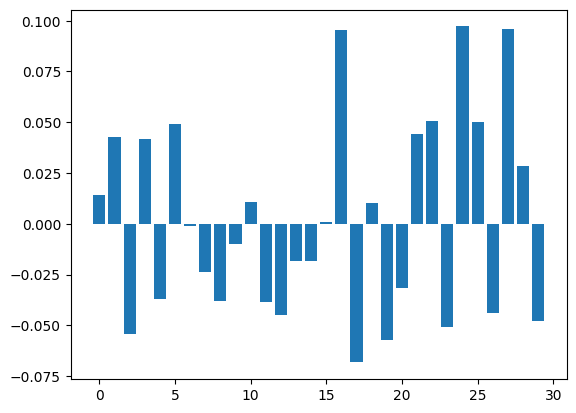

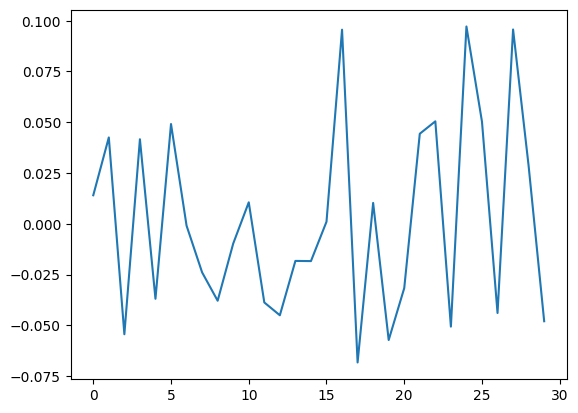

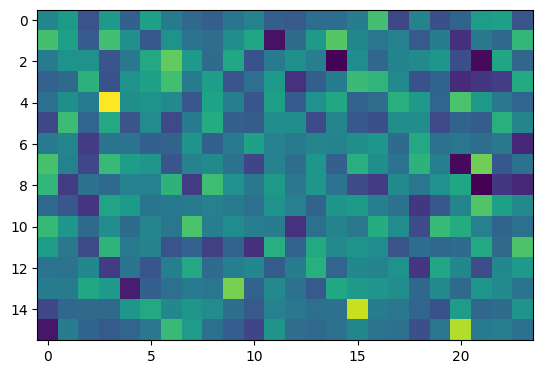

In [8]:
NUM_BARS = 30 # set to some big number (like 1000) to see all dimensions
plt.bar(range(emb_to_viz[:NUM_BARS].size), emb_to_viz[:NUM_BARS])
plt.show()

plt.plot(emb_to_viz[:NUM_BARS])
plt.show()

plt.imshow(emb_to_viz.reshape(16, 24))
plt.show()

Visualizing embeddings as images isn't an uncommon practice. In your own time, feel free to check out [this video about controlling LLM behavior](https://www.youtube.com/watch?v=UGO_Ehywuxc) that visualizes embeddings as images.

<span style="color:#ff5555;font-weight:bold;font-size:1.5rem;">
    STOP
</span>

... or keep going if you want to work ahead.

---

**Let's put this embedding knowledge to use!**

Since embeddings are a popular topic for interview questions, let's use embeddings to search a dataset of job listings.

In [9]:
import pandas as pd

In [ ]:
jobs_df = pd.read_csv('https://raw.githubusercontent.com/MSOE-AI-Club/workshops/refs/heads/main/Embeddings/job_title_des.csv') # Did you know that you can read CSVs directly from a URL?

In [ ]:
jobs_df

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...
...,...,...,...
2272,2399,Backend Developer,Job Summary\nPublished on : 26 days ago\nVacan...
2273,2400,Full Stack Developer,business entity cisco umbrella focus cloud-bas...
2274,2401,Network Administrator,Urgently reqd in a college in Mohali\nNetwork ...
2275,2402,Machine Learning,Key Responsibilities: Team leads for small or ...


We have

In [41]:
job_titles = jobs_df['Job Title']
job_descs = jobs_df['Job Description']
job_embs = model.encode(job_descs.tolist()[:500]) # Embedding all jobs would take ~1 minute on a CPU. On Rosie this would be instant.

In [42]:
query = model.encode("I need some Python for AI")

In [43]:
np.dot(query, job_embs[0]) # Cosine similarity between query and first job.
job_embs[0].dot(query) # Alternate syntax - used below to broadcast our singular query across all jobs.

np.float32(0.08054371)

In [66]:
similarities = job_embs.dot(query) # Cosine similarities between query and ALL jobs.
most_similar = np.argmax(similarities) # Index of the most similar job.

N = 1
nth_most_similar = np.argsort(similarities)[-N] # Index of the Nth most similar job.

In [58]:
print(
    f"Most similar job title: {job_titles[most_similar]}"
    f"\n\nMost similar job description:\n{job_descs[most_similar][1000:]} ..."
)

Most similar job title: Machine Learning

Most similar job description:
models at scale on Kubernetes or equivalent.
• Experience in building distributed deep learning models leveraging GPUs.
• Passion for solving challenging analytical problems. ...


In [67]:
print(
    f"Nth most similar job title: {job_titles[nth_most_similar]}"
    f"\n\nNth most similar job description:\n{job_descs[nth_most_similar][:1000]} ..."
)

Nth most similar job title: Machine Learning

Nth most similar job description:
Exp: 2 to 6 years

Seeking an AI/machine learning expert to help mature the capabilities of our AI solutions.

The ideal candidate will be able to apply predictive models and must possess strong software skills, expert mathematical skills, strong analytical skills, and excellent communication skills.
A certification in Machine Learning would be a plus.

• Knowledge of Algorithm Development, Machine Learning, Computer Vision, Image Segmentation, Image Processing, 3D Modeling, Object Detection.
• Deep understanding of statistics and experience with machine learning algorithms/techniques.
Proven programming skills, in particular Python, strong experience with DL frameworks such as Tensorflow, Torch and others.
• Scientific expertise and real-world experience in deep learning.
• Experience in applying machine learning techniques to real-world problems in a production environment/ AWS/ Azure cloud
• Experience o


TODO:

maybe: high level of embeddings in transformer/attention?